In [20]:
import numpy as np

In [21]:
def allInOne(path, i, rPathsArr, rOneArr, rMultArr, avgHopsPathsArr, avgHopsOneArr, avgHopsMultArr, avgHopsSPArr, printRes=True):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    def filterArraysToShortest(arr1, arr1Pos, arr2, arr2Pos):
        both_pos = np.logical_and(arr1Pos, arr2Pos)
        arr1Filt = arr1[both_pos] 
        arr2Filt = arr2[both_pos] 
    
        return arr1Filt, arr2Filt
    
    
    df = pd.read_csv(path)
    if printRes:
        display(df.head(5))
    
    reps = df['rep'].to_numpy()
    hopsRanked = df['hopsRanked'].to_numpy()
    hopsUnranked = df['hopsUnranked'].to_numpy()
    hopsRankedOne = df['hopsRankedOne'].to_numpy()
    hopsPath = df['hopsPath'].to_numpy()
    spLength = df['spLength'].to_numpy()

    hopsRankedPositive = hopsRanked > -1
    hopsUnrankedPositive = hopsUnranked > -1
    hopsRankedOnePositive = hopsRankedOne > -1
    hopsPathPositive = hopsPath > -1
    spLengthPositive = spLength > -1
    
    
    total = len(df.index)

    successesRanked = np.count_nonzero(hopsRanked > -1)
    successesRankedOne = np.count_nonzero(hopsRankedOne > -1)
    successesUnranked = np.count_nonzero(hopsUnranked > -1)
    successesPath = np.count_nonzero(hopsPath > -1)

    avgHopsPath = np.mean(hopsPath[hopsPathPositive])
    
    hopsPathFiltered,hopsRankedFiltered = filterArraysToShortest(hopsPath, hopsPathPositive, hopsRanked, hopsRankedPositive)
    avgHopsMult = np.mean(hopsRankedFiltered)
    avgHopsMultFull = np.mean(hopsRanked[hopsRankedPositive])
    
    if printRes:
        print("avg where both found D:", avgHopsMult)
        print("avg full:", avgHopsMultFull)
    
    hopsPathFiltered,hopsRankedOneFiltered = filterArraysToShortest(hopsPath, hopsPathPositive, hopsRankedOne, hopsRankedOnePositive)   
    avgHopsOne = np.mean(hopsRankedOneFiltered)
    
    avgSpLength = np.mean(spLength[spLengthPositive])

    percentPaths = (successesPath / total) * 100
    percentOne = (successesRankedOne / total) * 100
    percentRanked = (successesRanked / total) * 100
    
    if printRes:
        print("Resilience Paths: {}%".format(percentPaths))
        print("Resilience One Tree: {}%".format(percentOne))
        print("Resilience Trees: {}%".format(percentRanked))
        #print("Resilience Unranked: {}%".format((successesUnranked / total) * 100))

  
    hopsPathFiltered,hopsRankedFiltered = filterArraysToShortest(hopsPath, hopsPathPositive, hopsRanked, hopsRankedPositive)   
    


    diff = np.subtract(hopsPathFiltered,hopsRankedFiltered)
    if printRes:
        plt.scatter(np.arange(len(hopsPathFiltered)), diff, color="blue", s=1.5)
        plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)
    
    if printRes:
        print("Trees beat paths in {} runs".format(higherZero))
        print("Paths beat trees in {} runs".format(lowerZero))
        print("Both performed equally good in {} runs".format(equalZero))
    

    hopsPathFiltered,hopsRankedOneFiltered = filterArraysToShortest(hopsPath, hopsPathPositive, hopsRankedOne, hopsRankedOnePositive)   

    diff = np.subtract(hopsPathFiltered,hopsRankedOneFiltered)
    if printRes:
        plt.scatter(np.arange(len(hopsPathFiltered)), diff, color="blue", s=1.5);
        plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)
    
    if printRes:
        print("One Tree beat paths in {} runs".format(higherZero))
        print("Paths beat one tree in {} runs".format(lowerZero))
        print("Both performed equally good in {} runs".format(equalZero))




    hopsRankedOneFiltered,hopsRankedFiltered = filterArraysToShortest(hopsRankedOne, hopsRankedOnePositive, hopsRanked, hopsRankedPositive)   

    diff = np.subtract(hopsRankedOneFiltered,hopsRankedFiltered)
    
    if printRes:
        plt.scatter(np.arange(len(hopsRankedFiltered)), diff, color="blue", s=1.5);
        plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    if printRes:
        print("Multiple Trees beat One Tree in {} runs".format(higherZero))
        print("One Tree beat  multiple trees in {} runs".format(lowerZero))
        print("Both performed equally good in {} runs".format(equalZero))




    hopsUnrankedFiltered,hopsRankedFiltered = filterArraysToShortest(hopsUnranked, hopsUnrankedPositive, hopsRanked, hopsRankedPositive)   

    diff = np.subtract(hopsUnrankedFiltered,hopsRankedFiltered)
    if printRes:
        plt.scatter(np.arange(len(hopsRankedFiltered)), diff, color="blue", s=1.5);
        plt.show()

    higherZero = np.count_nonzero(diff > 0)
    lowerZero = np.count_nonzero(diff < 0)
    equalZero = np.count_nonzero(diff == 0)

    if printRes:
        print("Ranked Trees beat Unranked Tree in {} runs".format(higherZero))
        print("Unranked Tree beat ranked trees in {} runs".format(lowerZero))
        print("Both performed equally good in {} runs".format(equalZero))
    
    rPathsArr[i] = percentPaths
    rOneArr[i] = percentOne
    rMultArr[i] = percentRanked
    avgHopsPathsArr[i] = avgHopsPath
    avgHopsOneArr[i] = avgHopsOne
    avgHopsMultArr[i] = avgHopsMult
    avgHopsSPArr[i] = avgSpLength
    
    return 

In [22]:
def plotEval(rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP):
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.patches as mpatches
    
    xVals = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    
    edp_patch = mpatches.Patch(color='skyblue', label='EDPs')
    onetree_patch = mpatches.Patch(color='darkred', label='One Tree')
    multtrees_patch = mpatches.Patch(color='lightgreen', label='Multiple Trees')
    both_patch = mpatches.Patch(color='violet', label='EDPs + One Tree')
    
    
    plt.plot(xVals, rPaths, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4)
    plt.plot(xVals, rOne, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=4)
    plt.plot(xVals, rMult, marker='o', markerfacecolor='green', markersize=6, color='lightgreen', linewidth=4)
    plt.title('Resilience - Failure Rate')
    plt.xlabel('Failure Rate')
    plt.ylabel('Resilience')
 
    plt.legend(handles=[edp_patch, onetree_patch, multtrees_patch])
    plt.show()
    
    
    
    plt.plot(xVals, avgHopsPaths, marker='o', markerfacecolor='purple', markersize=6, color='violet', linewidth=4)
    #plt.plot(xVals, avgHopsPaths, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4)
    #plt.plot(xVals, avgHopsOne, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=4)
    plt.plot(xVals, avgHopsMult, marker='o', markerfacecolor='green', markersize=6, color='lightgreen', linewidth=4)
    plt.title('Avg. Hops - Failure Rate')
    plt.xlabel('Failure Rate')
    plt.ylabel('Average Hops')
    
    plt.legend(handles=[both_patch, multtrees_patch])
    plt.show()
    
    

    percentAvgsOneToPaths = []
    percentAvgsMultToPaths = []

    def getIncrease(val1, val2):
        return (abs(val2 - val1) / val1) * 100.0

    for i in range(len(avgHopsPaths)):
        percentAvgsOneToPaths.append(getIncrease(avgHopsPaths[i], avgHopsOne[i]))
        percentAvgsMultToPaths.append(getIncrease(avgHopsPaths[i], avgHopsMult[i]))
        
        
    plt.plot(xVals, percentAvgsOneToPaths, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=4)
    plt.plot(xVals, percentAvgsMultToPaths, marker='o', markerfacecolor='green', markersize=6, color='lightgreen', linewidth=4)

    plt.title('Percent Increase in Hops - Failure Rate')
    plt.xlabel('Failure Rate')
    plt.ylabel('Percent difference to BLUE')
    plt.show()
    
    
    percentAvgsOneToSP = []
    percentAvgsMultToSP = []
    percentAvgsPathsToSP = []

    for i in range(len(avgHopsPaths)):
        percentAvgsOneToSP.append(getIncrease(avgHopsSP[i], avgHopsOne[i]))

        percentAvgsMultToSP.append(getIncrease(avgHopsSP[i], avgHopsMult[i]))
        percentAvgsPathsToSP.append(getIncrease(avgHopsSP[i], avgHopsPaths[i]))
        
        
    plt.plot(xVals, percentAvgsOneToSP, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=4)
    plt.plot(xVals, percentAvgsMultToSP, marker='o', markerfacecolor='green', markersize=6, color='lightgreen', linewidth=4)
    plt.plot(xVals, percentAvgsPathsToSP, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4)

    plt.title('Percent Increase to SP - Failure Rate')
    plt.xlabel('Failure Rate')
    plt.ylabel('Percent difference to Shortest Path')
    plt.show()   

In [23]:
def plotEvalAx(ax, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.patches as mpatches
    
    linewidth = 2 
    ax1, ax2, index = ax
    
    xVals = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    
    edp_patch = mpatches.Patch(color='skyblue', label='EDPs')
    onetree_patch = mpatches.Patch(color='darkred', label='One Tree')
    multtrees_patch = mpatches.Patch(color='lightgreen', label='Multiple Trees')
    both_patch = mpatches.Patch(color='violet', label='EDPs + One Tree')
    
    
    ax1[index].plot(xVals, rPaths, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=linewidth)
    ax1[index].plot(xVals, rOne, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=linewidth)
    ax1[index].plot(xVals, rMult, marker='o', markerfacecolor='green', markersize=6, color='lightgreen', linewidth=linewidth)
    #ax.title('Resilience - Failure Rate')
    #ax.xlabel('Failure Rate')
    #ax.ylabel('Resilience')
 
    if index == 0:
        ax1[index].legend(handles=[edp_patch, onetree_patch, multtrees_patch])
    #ax.show()
    
    
    
    ax2[index].plot(xVals, avgHopsPaths, marker='o', markerfacecolor='purple', markersize=6, color='violet', linewidth=linewidth)
    #ax.plot(xVals, avgHopsPaths, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=linewidth)
    #ax.plot(xVals, avgHopsOne, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=linewidth)
    ax2[index].plot(xVals, avgHopsMult, marker='o', markerfacecolor='green', markersize=6, color='lightgreen', linewidth=linewidth)
    #ax.title('Avg. Hops - Failure Rate')
    #ax.xlabel('Failure Rate')
    #ax.ylabel('Average Hops')
    
    if index == 0:
        ax2[index].legend(handles=[both_patch, multtrees_patch])
    #ax.show()
    
    
    """
    percentAvgsOneToPaths = []
    percentAvgsMultToPaths = []

    def getIncrease(val1, val2):
        return (abs(val2 - val1) / val1) * 100.0

    for i in range(len(avgHopsPaths)):
        percentAvgsOneToPaths.append(getIncrease(avgHopsPaths[i], avgHopsOne[i]))
        percentAvgsMultToPaths.append(getIncrease(avgHopsPaths[i], avgHopsMult[i]))
        
        
    ax.plot(xVals, percentAvgsOneToPaths, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=4)
    ax.plot(xVals, percentAvgsMultToPaths, marker='o', markerfacecolor='green', markersize=6, color='lightgreen', linewidth=4)

    #ax.title('Percent Increase in Hops - Failure Rate')
    #ax.xlabel('Failure Rate')
    #ax.ylabel('Percent difference to BLUE')
    #ax.show()
    
    
    percentAvgsOneToSP = []
    percentAvgsMultToSP = []
    percentAvgsPathsToSP = []

    for i in range(len(avgHopsPaths)):
        percentAvgsOneToSP.append(getIncrease(avgHopsSP[i], avgHopsOne[i]))

        percentAvgsMultToSP.append(getIncrease(avgHopsSP[i], avgHopsMult[i]))
        percentAvgsPathsToSP.append(getIncrease(avgHopsSP[i], avgHopsPaths[i]))
        
        
    ax.plot(xVals, percentAvgsOneToSP, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=4)
    ax.plot(xVals, percentAvgsMultToSP, marker='o', markerfacecolor='green', markersize=6, color='lightgreen', linewidth=4)
    ax.plot(xVals, percentAvgsPathsToSP, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4)

    #ax.title('Percent Increase to SP - Failure Rate')
    #ax.xlabel('Failure Rate')
    #ax.ylabel('Percent difference to Shortest Path')
    #plt.show()   
    """

In [24]:
def plotEvalAx2(xVals, ax, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, markersize=3, alpha=1):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.patches as mpatches
    
    linewidth = 2 
    ax1, ax2, index = ax
    
    edp_patch = mpatches.Patch(color='skyblue', label='EDPs')
    onetree_patch = mpatches.Patch(color='darkred', label='One Tree')
    multtrees_patch = mpatches.Patch(color='lightgreen', label='Multiple Trees')
    both_patch = mpatches.Patch(color='violet', label='EDPs + One Tree')
    
    ax1[index].plot(xVals, rPaths, marker='o', markerfacecolor='blue', markersize=markersize, color='skyblue', linewidth=linewidth, alpha=alpha)
    ax1[index].plot(xVals, rOne, marker='x', markerfacecolor='red', markersize=markersize, color='darkred', linewidth=linewidth, alpha=alpha)
    ax1[index].plot(xVals, rMult, marker='o', markerfacecolor='green', markersize=markersize, color='lightgreen', linewidth=linewidth, alpha=alpha)
    #ax.title('Resilience - Failure Rate')
    #ax.xlabel('Failure Rate')
    #ax.ylabel('Resilience')
 
    if index == 0:
        ax1[index].legend(handles=[edp_patch, onetree_patch, multtrees_patch])
    #ax.show()
    
    
    
    ax2[index].plot(xVals, avgHopsPaths, marker='o', markerfacecolor='purple', markersize=markersize, color='violet', linewidth=linewidth, alpha=1)
    #ax.plot(xVals, avgHopsPaths, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=linewidth)
    #ax.plot(xVals, avgHopsOne, marker='o', markerfacecolor='red', markersize=6, color='darkred', linewidth=linewidth)
    ax2[index].plot(xVals, avgHopsMult, marker='o', markerfacecolor='green', markersize=markersize, color='lightgreen', linewidth=linewidth, alpha=1)
    #ax.title('Avg. Hops - Failure Rate')
    #ax.xlabel('Failure Rate')
    #ax.ylabel('Average Hops')
    
    if index == 0:
        ax2[index].legend(handles=[both_patch, multtrees_patch])
    #ax.show()
    

In [10]:
nrFiles = len(files)

rPaths = [None] * nrFiles
rOne = [None] * nrFiles
rMult = [None] * nrFiles

avgHopsPaths = [None] * nrFiles
avgHopsOne = [None] * nrFiles
avgHopsMult = [None] * nrFiles
avgHopsSP = [None] * nrFiles


In [46]:
def printHopPercent(avgHopsPaths, avgHopsOne, avgHopsMult):
    increaseArrMult = np.array(avgHopsMult) / np.array(avgHopsPaths)
    increaseArrOne = np.array(avgHopsOne) / np.array(avgHopsPaths)
    print("percent increase mult to edp:", increaseArrMult)
    print("percent increase one to edp:", increaseArrOne)

    print("avg increase mult to edp:", np.mean(increaseArrMult))
    print("avg increase one to edp:", np.mean(increaseArrOne))

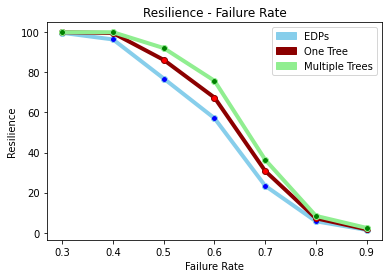

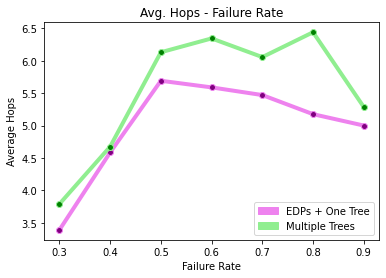

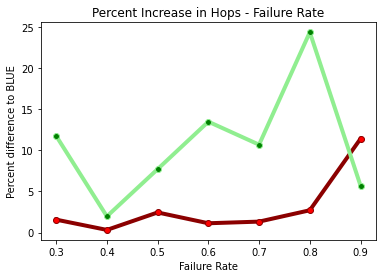

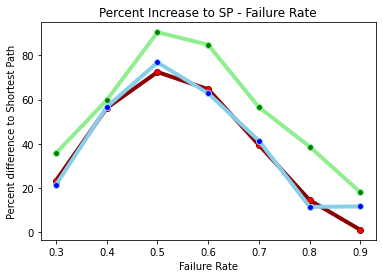

percent increase mult to edp: [1.11771665 1.01968326 1.07723949 1.13506738 1.10703125 1.2440678
 1.05714286]
percent increase one to edp: [1.01567584 0.99683258 0.97554845 1.01128173 0.98671875 1.02711864
 0.88571429]
avg increase mult to edp: 1.1082783826663614
avg increase one to edp: 0.9855557529219902


In [47]:
path_base = 'CSVs/zoo-attmpls-clustered/'
files = ['trees-n25-f0.3.csv', 
         'trees-n25-f0.4.csv', 
         'trees-n25-f0.5.csv',
         'trees-n25-f0.6.csv',
         'trees-n25-f0.7.csv',
         'trees-n25-f0.8.csv',
         'trees-n25-f0.9.csv'
        ]


for i in range(nrFiles):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
plotEval(rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

printHopPercent(avgHopsPaths, avgHopsOne, avgHopsMult)

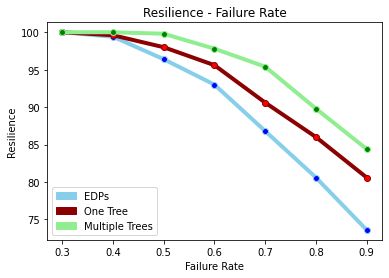

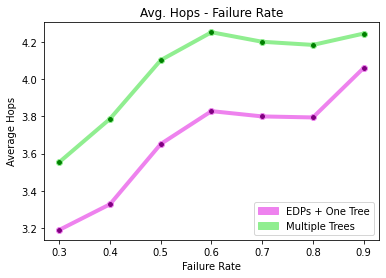

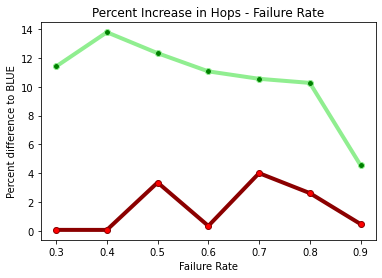

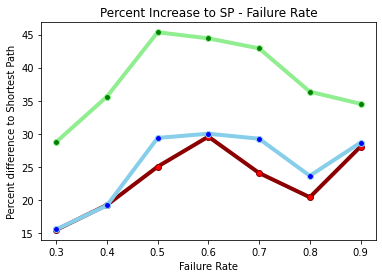

percent increase mult to edp: [1.11410658 1.13784764 1.12329545 1.11067416 1.1055185  1.10268149
 1.04551539]
percent increase one to edp: [0.99937304 1.00060459 0.96647727 0.99662921 0.95997574 0.97383911
 0.99531459]
avg increase mult to edp: 1.105662745591805
avg increase one to edp: 0.9846019381412191


In [48]:
path_base = 'CSVs/zoo-attmpls-random/'

xVals = []
x = 1.0
while(x <= 50):
    xVals.append(x)
    x += 1.0
    x = round(x, 1)

files = ['trees-n25-ff'+str(val)+'.csv' for val in xVals]


for i in range(nrFiles):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
plotEval(rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP)

printHopPercent(avgHopsPaths, avgHopsOne, avgHopsMult)

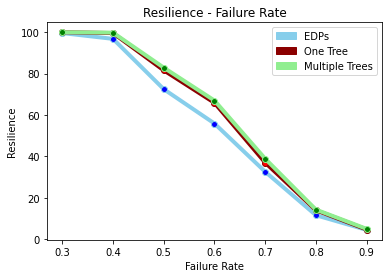

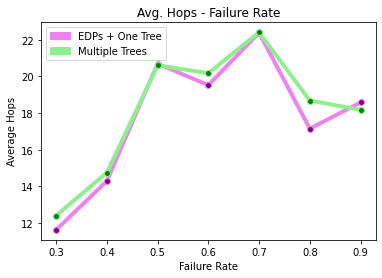

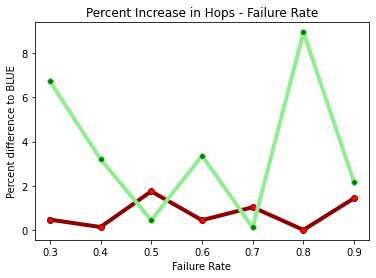

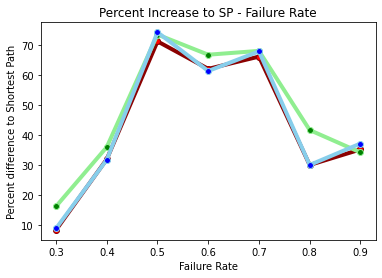

percent increase mult to edp: [1.06735751 1.03201098 0.99560117 1.03363578 1.00109634 1.08949221
 0.9784689 ]
percent increase one to edp: [0.99533679 1.00130067 0.98253799 1.00439923 0.9897218  1.
 0.98564593]
avg increase mult to edp: 1.0282375567791984
avg increase one to edp: 0.9941346308682817


In [49]:
path_base = 'CSVs/zoo-cogentco-clustered/'
files = ['trees-n197-f0.3.csv', 
         'trees-n197-f0.4.csv', 
         'trees-n197-f0.5.csv',
         'trees-n197-f0.6.csv',
         'trees-n197-f0.7.csv',
         'trees-n197-f0.8.csv',
         'trees-n197-f0.9.csv'
        ]
for i in range(nrFiles):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
plotEval(rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

printHopPercent(avgHopsPaths, avgHopsOne, avgHopsMult)

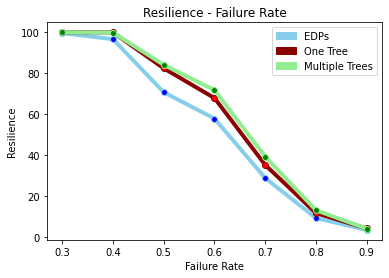

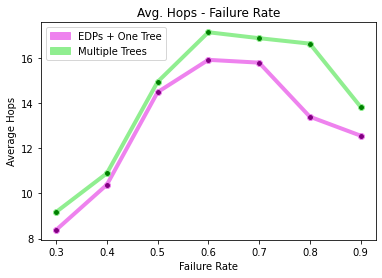

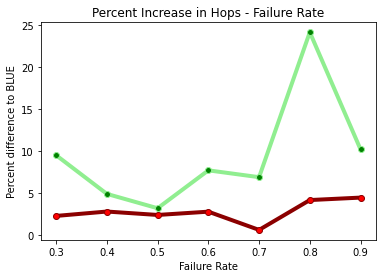

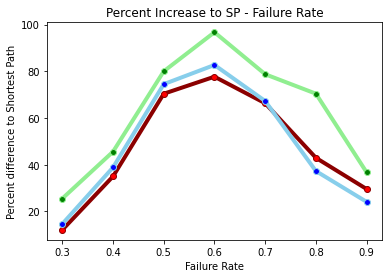

percent increase mult to edp: [1.09473054 1.04864434 1.03155221 1.07674772 1.06861026 1.24146148
 1.10176991]
percent increase one to edp: [0.97760479 0.97238836 0.97645795 0.97253582 0.99430075 1.04130262
 1.04424779]
avg increase mult to edp: 1.0947880653561552
avg increase one to edp: 0.9969768673150614


In [53]:
path_base = 'CSVs/zoo-deltacom-clustered/'
files = ['trees-n113-f0.3.csv', 
         'trees-n113-f0.4.csv', 
         'trees-n113-f0.5.csv',
         'trees-n113-f0.6.csv',
         'trees-n113-f0.7.csv',
         'trees-n113-f0.8.csv',
         'trees-n113-f0.9.csv'
        ]
for i in range(nrFiles):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
plotEval(rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

printHopPercent(avgHopsPaths, avgHopsOne, avgHopsMult)

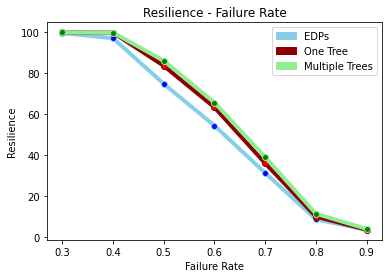

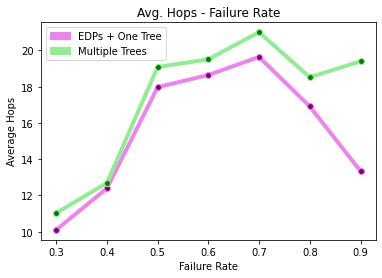

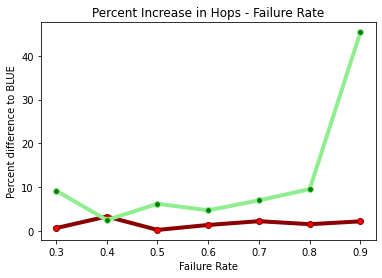

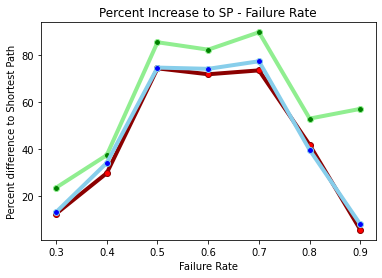

percent increase mult to edp: [1.0917495  1.0244389  1.06158423 1.04674095 1.06946478 1.09517335
 1.45396146]
percent increase one to edp: [0.99403579 0.96749792 0.99814057 0.98678631 0.97820075 1.01495581
 0.97858672]
avg increase mult to edp: 1.120444739640314
avg increase one to edp: 0.9883148396163667


In [54]:
path_base = 'CSVs/zoo-gtsce-clustered/'
files = ['trees-n149-f0.3.csv', 
         'trees-n149-f0.4.csv', 
         'trees-n149-f0.5.csv',
         'trees-n149-f0.6.csv',
         'trees-n149-f0.7.csv',
         'trees-n149-f0.8.csv',
         'trees-n149-f0.9.csv'
        ]
for i in range(nrFiles):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
plotEval(rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

printHopPercent(avgHopsPaths, avgHopsOne, avgHopsMult)

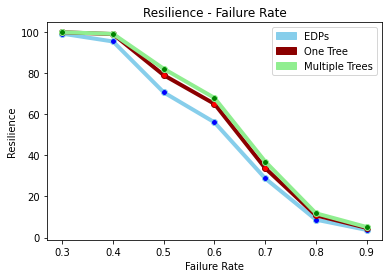

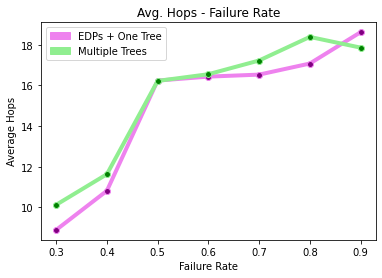

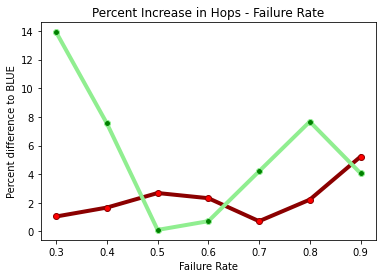

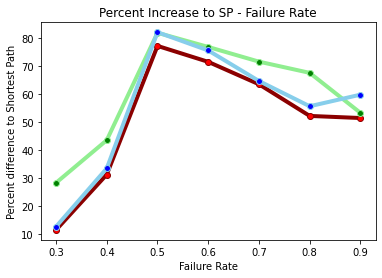

percent increase mult to edp: [1.13915014 1.07542603 0.99895498 1.00715758 1.04199916 1.07671602
 0.95936139]
percent increase one to edp: [0.98957507 0.98334624 0.97317774 0.9767921  0.99286014 0.97779273
 0.94775036]
avg increase mult to edp: 1.042680755641879
avg increase one to edp: 0.9773277711198273


In [51]:
path_base = 'CSVs/zoo-interoute-clustered/'
files = ['trees-n110-f0.3.csv', 
         'trees-n110-f0.4.csv', 
         'trees-n110-f0.5.csv',
         'trees-n110-f0.6.csv',
         'trees-n110-f0.7.csv',
         'trees-n110-f0.8.csv',
         'trees-n110-f0.9.csv'
        ]
for i in range(nrFiles):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
plotEval(rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

#print(avgHopsMult)
#print(avgHopsOne)
#print(avgHopsPaths)

printHopPercent(avgHopsPaths, avgHopsOne, avgHopsMult)

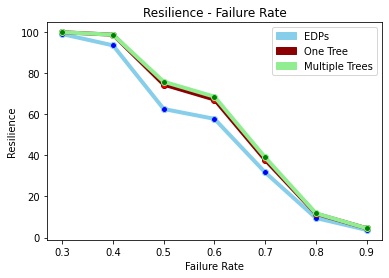

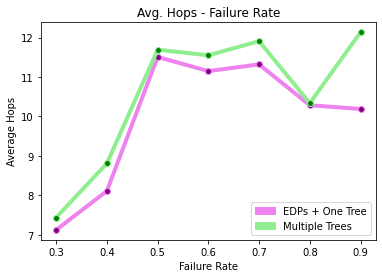

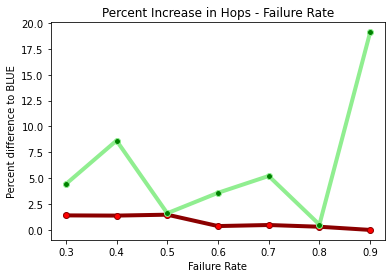

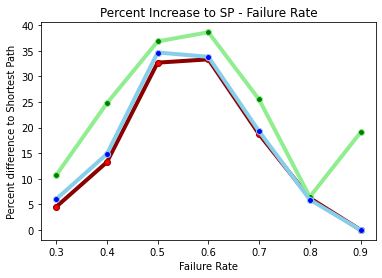

percent increase mult to edp: [1.04420516 1.08629776 1.01610217 1.03584174 1.05211817 1.00511771
 1.19098143]
percent increase one to edp: [0.98597336 0.98616601 0.98528595 0.99627618 0.99526198 1.00307062
 1.        ]
avg increase mult to edp: 1.0615234474336122
avg increase one to edp: 0.9931477307933346


In [52]:
path_base = 'CSVs/zoo-oteglobe-clustered/'
files = ['trees-n93-f0.3.csv', 
         'trees-n93-f0.4.csv', 
         'trees-n93-f0.5.csv',
         'trees-n93-f0.6.csv',
         'trees-n93-f0.7.csv',
         'trees-n93-f0.8.csv',
         'trees-n93-f0.9.csv'
        ]
for i in range(nrFiles):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
plotEval(rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 



printHopPercent(avgHopsPaths, avgHopsOne, avgHopsMult)

NameError: name 'np' is not defined

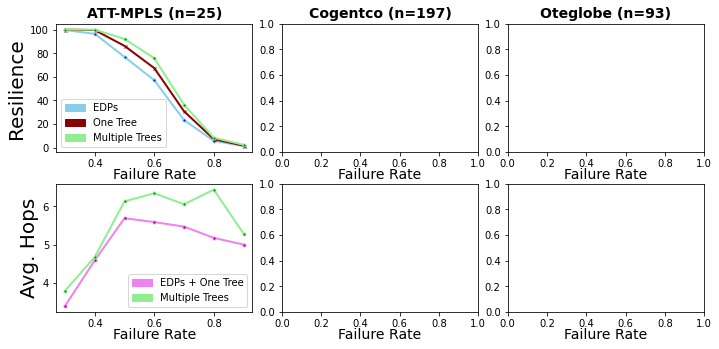

In [18]:
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(2, 3, figsize=(10,5))

#fig.suptitle('Experiment Results for Clustered Failures (1000 runs)', fontsize=16)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.9, 
                    wspace=0.15, 
                    hspace=0.25)

fontsize1 = 14
fontsize2 = 20
fontsize3 = 14

ax1[0].set_title('ATT-MPLS (n=25)', fontsize=fontsize1, fontweight='bold')
ax1[0].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
ax1[0].set_ylabel('Resilience', fontsize=fontsize2)

ax1[1].set_title('Cogentco (n=197)', fontsize=fontsize1, fontweight='bold')
ax1[1].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
#ax1[1].set_ylabel('Resilience')

ax1[2].set_title('Oteglobe (n=93)', fontsize=fontsize1, fontweight='bold')
ax1[2].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
#ax1[2].set_ylabel('Resilience')


#ax2[0].set_title('ATT-MPLS (n=25)')
ax2[0].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
ax2[0].set_ylabel('Avg. Hops', fontsize=fontsize2)

#ax2[1].set_title('Cogentco (n=197)')
ax2[1].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
#ax2[1].set_ylabel('Avg. Hops Needed')

#ax2[2].set_title('Oteglobe (n=93)')
ax2[2].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
#ax2[2].set_ylabel('Avg. Hops Needed')

#------------------------------------------------------------------------------------

path_base = 'CSVs/zoo-attmpls-clustered/'
files = ['trees-n25-f0.3.csv', 
         'trees-n25-f0.4.csv', 
         'trees-n25-f0.5.csv',
         'trees-n25-f0.6.csv',
         'trees-n25-f0.7.csv',
         'trees-n25-f0.8.csv',
         'trees-n25-f0.9.csv'
        ]
nrFiles = len(files)
rPaths = [None] * nrFiles
rOne = [None] * nrFiles
rMult = [None] * nrFiles

avgHopsPaths = [None] * nrFiles
avgHopsOne = [None] * nrFiles
avgHopsMult = [None] * nrFiles
avgHopsSP = [None] * nrFiles

for i in range(nrFiles):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
xVals = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
plotEvalAx2(xVals, (ax1, ax2, 0), rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

zoo1resDiffMult = np.max(np.array(rMult) - np.array(rPaths))
zoo1resDiffOne = np.max(np.array(rOne) - np.array(rPaths))
zoo1hopIncrease = np.mean(np.array(avgHopsMult) - np.array(avgHopsPaths))

#------------------------------------------------------------------------------------


path_base = 'CSVs/zoo-cogentco-clustered/'
files = ['trees-n197-f0.3.csv', 
         'trees-n197-f0.4.csv', 
         'trees-n197-f0.5.csv',
         'trees-n197-f0.6.csv',
         'trees-n197-f0.7.csv',
         'trees-n197-f0.8.csv',
         'trees-n197-f0.9.csv'
        ]
nrFiles = len(files)
rPaths = [None] * nrFiles
rOne = [None] * nrFiles
rMult = [None] * nrFiles

avgHopsPaths = [None] * nrFiles
avgHopsOne = [None] * nrFiles
avgHopsMult = [None] * nrFiles
avgHopsSP = [None] * nrFiles

for i in range(nrFiles):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
xVals = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    
plotEvalAx2(xVals, (ax1, ax2, 1), rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

zoo2resDiffMult = np.max(np.array(rMult) - np.array(rPaths))
zoo2resDiffOne = np.max(np.array(rOne) - np.array(rPaths))
zoo2hopIncrease = np.mean(np.array(avgHopsMult) - np.array(avgHopsPaths))

#------------------------------------------------------------------------------------



path_base = 'CSVs/zoo-oteglobe-clustered/'
files = ['trees-n93-f0.3.csv', 
         'trees-n93-f0.4.csv', 
         'trees-n93-f0.5.csv',
         'trees-n93-f0.6.csv',
         'trees-n93-f0.7.csv',
         'trees-n93-f0.8.csv',
         'trees-n93-f0.9.csv'
        ]

nrFiles = len(files)
rPaths = [None] * nrFiles
rOne = [None] * nrFiles
rMult = [None] * nrFiles

avgHopsPaths = [None] * nrFiles
avgHopsOne = [None] * nrFiles
avgHopsMult = [None] * nrFiles
avgHopsSP = [None] * nrFiles
for i in range(nrFiles):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
xVals = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    
plotEvalAx2(xVals, (ax1, ax2, 2), rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

zoo3resDiffMult = np.max(np.array(rMult) - np.array(rPaths))
zoo3resDiffOne = np.max(np.array(rOne) - np.array(rPaths))
zoo3hopIncrease = np.mean(np.array(avgHopsMult) - np.array(avgHopsPaths))

print("max res diff mult:", np.max([zoo1resDiffMult, zoo2resDiffMult, zoo3resDiffMult]))
print("max res diff one:", np.max([zoo1resDiffOne, zoo2resDiffOne, zoo3resDiffOne]))
print("mean increase:", np.mean([zoo1hopIncrease, zoo2hopIncrease, zoo3hopIncrease]))

fig.savefig('subplots_zoo_clustered_.png', bbox_inches="tight")
fig.savefig('subplots_zoo_clustered_.svg', bbox_inches="tight")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 3, figsize=(10,5))

#fig.suptitle('Experiment Results for Clustered Failures (1000 runs)', fontsize=16)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1, 
                    top=0.9, 
                    wspace=0.15, 
                    hspace=0.25)

fontsize1 = 14
fontsize2 = 20
fontsize3 = 14

ax1[0].set_title('ATT-MPLS (n=25)', fontsize=fontsize1, fontweight='bold')
ax1[0].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
ax1[0].set_ylabel('Resilience', fontsize=fontsize2)

ax1[1].set_title('Cogentco (n=197)', fontsize=fontsize1, fontweight='bold')
ax1[1].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
#ax1[1].set_ylabel('Resilience')

ax1[2].set_title('Oteglobe (n=93)', fontsize=fontsize1, fontweight='bold')
ax1[2].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
#ax1[2].set_ylabel('Resilience')


#ax2[0].set_title('ATT-MPLS (n=25)')
ax2[0].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
ax2[0].set_ylabel('Avg. Hops', fontsize=fontsize2)

#ax2[1].set_title('Cogentco (n=197)')
ax2[1].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
#ax2[1].set_ylabel('Avg. Hops Needed')

#ax2[2].set_title('Oteglobe (n=93)')
ax2[2].set_xlabel('Failure Rate',labelpad=-1, fontsize=fontsize3)
#ax2[2].set_ylabel('Avg. Hops Needed')


endIndex = 10
#------------------------------------------------------------------------------------

path_base = 'CSVs/zoo-attmpls-random/'

xVals = []
x = 1.0
while(x <= endIndex):
    xVals.append(x)
    x += 1.0
    x = round(x, 1)
    

files = ['trees-n25-ff'+str(val)+'.csv' for val in xVals]

rPaths = [None] * len(files)
rOne = [None] * len(files)
rMult = [None] * len(files)

avgHopsPaths = [None] * len(files)
avgHopsOne = [None] * len(files)
avgHopsMult = [None] * len(files)
avgHopsSP = [None] * len(files)

for i in range(len(files)):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
#plotEval(rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 
    
plotEvalAx2(xVals, (ax1, ax2, 0), rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

zoo1resDiffMult = np.max(np.array(rMult) - np.array(rPaths))
zoo1resDiffOne = np.max(np.array(rOne) - np.array(rPaths))
zoo1hopIncrease = np.mean(np.array(avgHopsMult) - np.array(avgHopsPaths))

#------------------------------------------------------------------------------------


path_base = 'CSVs/zoo-cogentco-random/'
xVals = []
x = 1.0
while(x <= endIndex):
    xVals.append(x)
    x += 1.0
    x = round(x, 1)

files = ['trees-n197-ff'+str(val)+'.csv' for val in xVals]

rPaths = [None] * len(files)
rOne = [None] * len(files)
rMult = [None] * len(files)

avgHopsPaths = [None] * len(files)
avgHopsOne = [None] * len(files)
avgHopsMult = [None] * len(files)
avgHopsSP = [None] * len(files)

for i in range(len(files)):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
plotEvalAx2(xVals, (ax1, ax2, 1), rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

zoo2resDiffMult = np.max(np.array(rMult) - np.array(rPaths))
zoo2resDiffOne = np.max(np.array(rOne) - np.array(rPaths))
zoo2hopIncrease = np.mean(np.array(avgHopsMult) - np.array(avgHopsPaths))

#------------------------------------------------------------------------------------



path_base = 'CSVs/zoo-oteglobe-random/'
xVals = []
x = 1.0
while(x <= endIndex):
    xVals.append(x)
    x += 1.0
    x = round(x, 1)

files = ['trees-n93-ff'+str(val)+'.csv' for val in xVals]

rPaths = [None] * len(files)
rOne = [None] * len(files)
rMult = [None] * len(files)

avgHopsPaths = [None] * len(files)
avgHopsOne = [None] * len(files)
avgHopsMult = [None] * len(files)
avgHopsSP = [None] * len(files)

for i in range(len(files)):
    allInOne(path_base + files[i], i, rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP, printRes=False)
    
plotEvalAx2(xVals, (ax1, ax2, 2), rPaths, rOne, rMult, avgHopsPaths, avgHopsOne, avgHopsMult, avgHopsSP) 

zoo3resDiffMult = np.max(np.array(rMult) - np.array(rPaths))
zoo3resDiffOne = np.max(np.array(rOne) - np.array(rPaths))
zoo3hopIncrease = np.mean(np.array(avgHopsMult) - np.array(avgHopsPaths))


print("max res diff mult:", np.max([zoo1resDiffMult, zoo2resDiffMult, zoo3resDiffMult]))
print("max res diff one:", np.max([zoo1resDiffOne, zoo2resDiffOne, zoo3resDiffOne]))
print("mean increase:", np.mean([zoo1hopIncrease, zoo2hopIncrease, zoo3hopIncrease]))

fig.savefig('subplots_zoo_random_.png', bbox_inches="tight")
fig.savefig('subplots_zoo_random_.svg', bbox_inches="tight")

In [ ]:
#do relative drop-off!